In [11]:
import mdp
import numpy as np
from osgeo import gdal_array

In [12]:

file = "../data/triangle.tif"

# Read raster data as numeric array from file
rasterArray = gdal_array.LoadFile(file)
type(rasterArray) # is numpy.ndarray

rasterArray.min()
rasterArray.max() 
nodata = rasterArray.max() # in here min value is nodata

#Create a masked array for making calculations without nodata values
rasterArray = np.ma.masked_equal(rasterArray, nodata)
type(rasterArray)

# Check again array statistics
rasterArray.max()

# reshape rasterArray
size = rasterArray.shape
data = rasterArray.reshape(size[0], size[1]*size[2]).transpose()
data = data.astype(np.float32)


In [13]:
data

masked_array(
  data=[[1715.0, 2095.0, 2945.0, ..., 316.0, 38.0, 163.0],
        [2073.0, 2656.0, 3350.0, ..., 323.0, 38.0, 162.0],
        [2176.0, 2806.0, 3638.0, ..., 329.0, 38.0, 162.0],
        ...,
        [1817.0, 2282.0, 3003.0, ..., 227.0, 94.0, 147.0],
        [1766.0, 2170.0, 2945.0, ..., 224.0, 96.0, 148.0],
        [1715.0, 2058.0, 2772.0, ..., 220.0, 98.0, 149.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=7350.0,
  dtype=float32)

In [14]:
mdp.numx_rand.seed(1266090063)

In [15]:
len(data)

62379

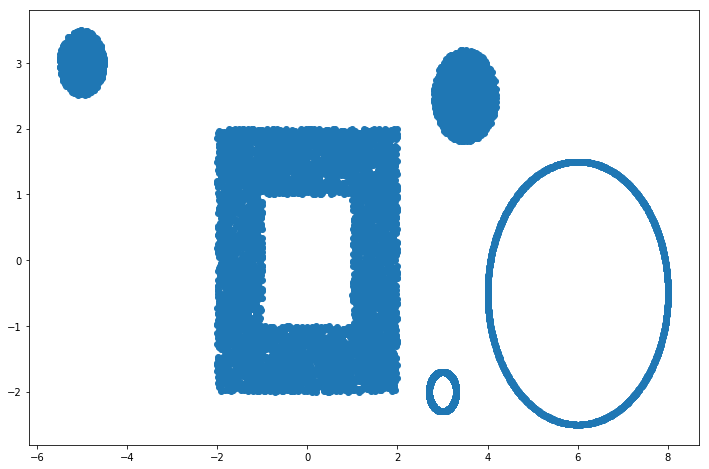

In [194]:
plt.figure(figsize=(12, 8))
plt.scatter(data[:,0], data[:,1])

In [16]:
gng = mdp.nodes.GrowingNeuralGasNode(max_nodes=100000)

In [17]:
gng.get_current_train_phase()

0

In [ ]:
STEP = 500

#plt.figure(figsize=(12,8))
x = []
y = []
for i in range(0, data.shape[0], STEP):
    gng.train(data[i:i+STEP])
    nodes = gng.get_nodes_position()
    #print(len(nodes), nodes)
    x = nodes[:,0]
    y = nodes[:,1]
    #print(x, y)
    #print(gng.graph.connected_components())
    #print(len(x), len(y), x.size, y.size)
    #plt.scatter(x, y, c='r')
    #print(gng.get_output_dim())
    # [...] plotting instructions
    


In [210]:
len(gng.get_nodes_position())

131

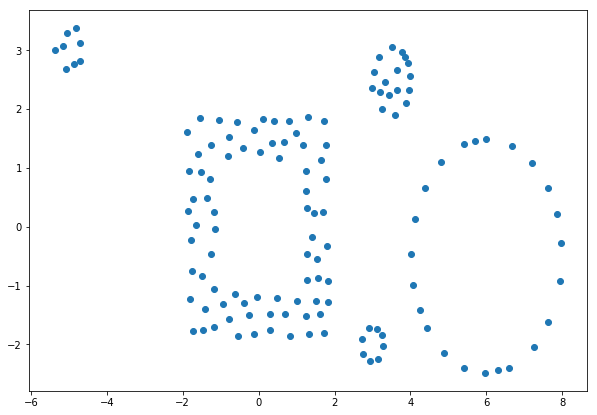

In [211]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)

In [212]:
gng.stop_training()

In [213]:
n_obj = len(gng.graph.connected_components())

In [214]:
n_obj

5

In [215]:
components = gng.graph.connected_components()

In [216]:
colors = []

In [217]:
for i, graph in enumerate(gng.nearest_neighbor(data)[0]):
    for j, graphs in enumerate(components):
        for elem in graphs:
            if graph == elem:
                colors = np.append(colors, j+1)
                #print('idx', i, 'elem', data[i], 'component', j+1)

In [218]:
colors

array([4., 1., 5., ..., 3., 4., 3.])

In [219]:
wcolors = np.where(colors==1,'r',
                   np.where(colors==2,'g',
                            np.where(colors==3, 'b',
                                    np.where(colors==4, 'c',
                                            np.where(colors==5, 'm', 'k')))))

In [220]:
wcolors

array(['c', 'r', 'm', ..., 'b', 'c', 'b'], dtype='<U1')

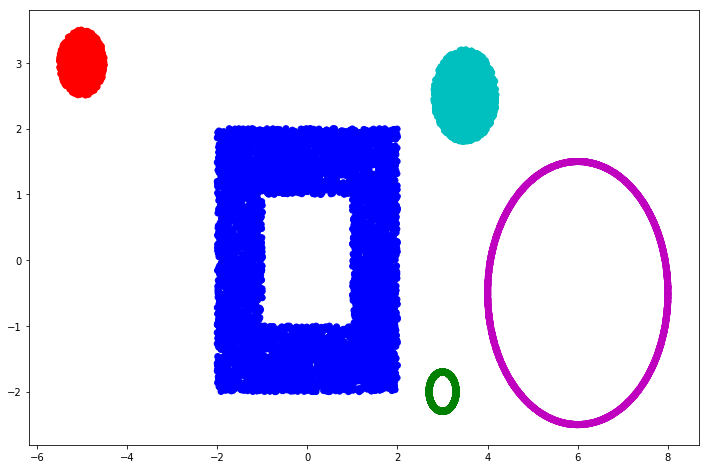

In [221]:
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], c=wcolors)

In [180]:
for i, graph in enumerate(gng.graph.nodes):
    for j, graphs in enumerate(components):
        for elem in graphs:
            if graph == elem:
                print('idx', i, 'elem', graph.data.pos, 'component', j+1, graph.data.label, graph.data.hits)

idx 0 elem [ 7.23254388 -2.05746195] component 1 None 0
idx 1 elem [-5.36403613  3.10224658] component 2 None 0
idx 2 elem [3.17291098 2.25801587] component 3 None 0
idx 3 elem [-1.2256433   0.31519241] component 4 None 0
idx 4 elem [ 2.73457925 -1.90414328] component 5 None 0
idx 5 elem [0.28295617 1.69266225] component 4 None 0
idx 6 elem [-1.85676738 -1.16814534] component 4 None 0
idx 7 elem [ 5.40657185 -2.40082517] component 1 None 0
idx 8 elem [-0.74929041  1.24010923] component 4 None 0
idx 9 elem [7.80357965 0.3454038 ] component 1 None 0
idx 10 elem [ 1.4475024 -0.9739248] component 4 None 0
idx 11 elem [1.28392604 0.28316961] component 4 None 0
idx 12 elem [ 4.28184017 -1.50459491] component 1 None 0
idx 13 elem [1.73387008 1.79385598] component 4 None 0
idx 14 elem [5.41178705 1.39970947] component 1 None 0
idx 15 elem [-1.78444511  1.78496129] component 4 None 0
idx 16 elem [ 0.78977649 -1.83671335] component 4 None 0
idx 17 elem [4.0245481  2.14967485] component 3 None 0


In [181]:
colors = np.zeros(len(data))

In [182]:
for graph in gng.graph.nodes:
    for j, graphs in enumerate(components):
        for elem in graphs:
            if graph == elem:
                colors = np.append(colors, j+1)
                continue

In [183]:
colors

array([0., 0., 0., ..., 4., 4., 3.])

In [184]:
wcolors = np.where(colors==1,'r',
                   np.where(colors==2,'g',
                            np.where(colors==3, 'b',
                                    np.where(colors==4, 'c',
                                            np.where(colors==5, 'm', 'k')))))

In [185]:
wcolors

array(['k', 'k', 'k', ..., 'c', 'c', 'b'], dtype='<U1')

In [186]:
conX = np.concatenate((data[:,0],gng.get_nodes_position()[:,0]))
conY = np.concatenate((data[:,1],gng.get_nodes_position()[:,1]))

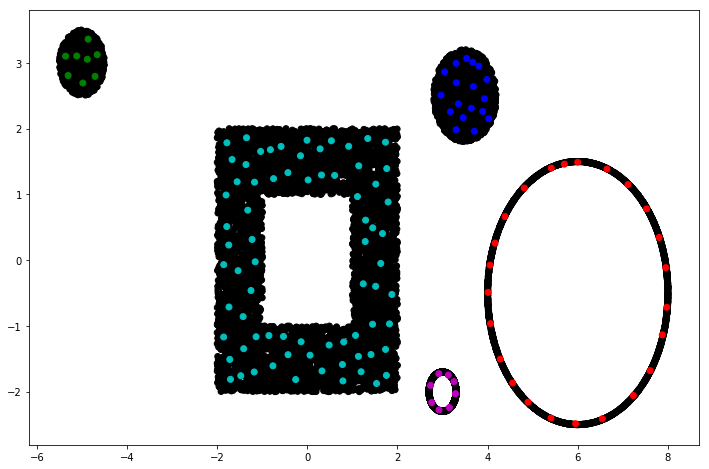

In [187]:
plt.figure(figsize=(12,8))
plt.scatter(conX, conY, c=wcolors)